<a href="https://colab.research.google.com/github/bcdmodelos/qualificacao-modelscode/blob/main/Modelo-Computacional/codigo_modelo_prophet_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Regressão pelo Prophet do Dados de COVID-19 para o Brasil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

drive  sample_data


In [4]:
%cd /content/drive/MyDrive/Notebooks_Doutorado/base-campina/

!ls

/content/drive/MyDrive/Notebooks_Doutorado/base-campina
dataset_Amazonas_usableData.csv
dataset_Bodocongo_usable.csv
dataset_Brasil_usableData.csv
dataset_CampinaGrande_casos_acumulados_usable.csv
dataset_CampinaGrande_casos_diarios_usable.csv
dataset_CampinaGrande_usableData.csv
dataset_Catole_usable.csv
dataset_Malvinas_usable.csv
dataset_Paraiba_usableData.csv
dataset_Pernambuco_usableData.csv
dfBrasil.csv
dfBrasilProphet.csv


In [5]:
file_path = "./dfBrasilProphet.csv"
dfCasosBrasil = pd.read_csv(file_path, encoding='latin1')
dfCasosBrasil.head()

,ds,y
0,2020-03-22,1594
1,2020-03-23,1952
2,2020-03-24,2255
3,2020-03-25,2566
4,2020-03-26,2990


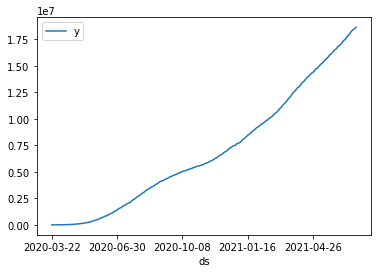

In [6]:
dfCasosBrasil.set_index('ds').plot();

In [15]:
m = Prophet()
m = m.fit(dfCasosBrasil)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq6rvo12g/rbtifqqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq6rvo12g/56pf0awf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42127', 'data', 'file=/tmp/tmpq6rvo12g/rbtifqqg.json', 'init=/tmp/tmpq6rvo12g/56pf0awf.json', 'output', 'file=/tmp/tmpq6rvo12g/prophet_modelobwbx4wb/prophet_model-20221019015422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:54:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:54:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


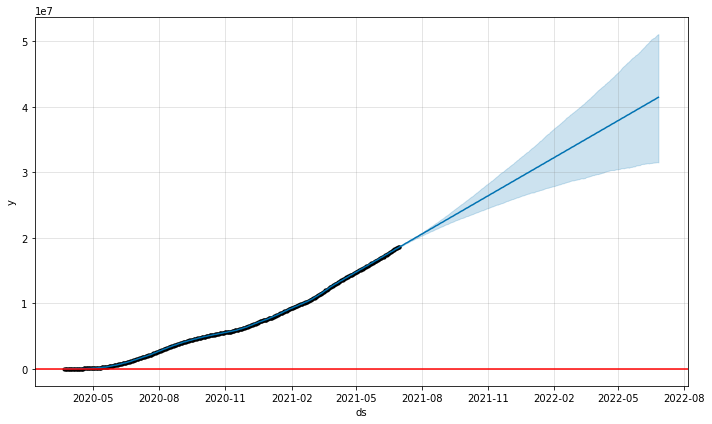

In [14]:
m.plot(forecast)
plt.axhline(y=0, color='red')

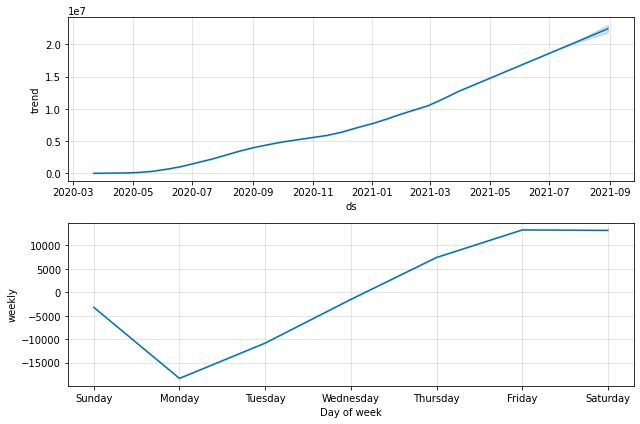

In [12]:
m.plot_components(forecast);